<div align="center" style="border:solid 1px gray;">
    <a href="https://openalex.org/">
        <img src="https://raw.githubusercontent.com/ourresearch/openalex-api-tutorials/1988d22c5499d6a1f68d85ef2902b600b555aaa5/resources/img/OpenAlex-banner.png" alt="OpenAlex banner" width="300">
    </a>
</div>

# Monitoring Open Access publications for a given institution

<div style='background:#e7edf7'>
    In this notebook we will query the OpenAlex API to answer the question:
    <blockquote>
        <b><i>How many of recent journal articles from a given institution are Open Access? And how many aren't?</i></b>
    </blockquote>
    To get to the bottom of this, we will use the following API functionalities:
    <a href="https://docs.openalex.org/how-to-use-the-api/get-lists-of-entities/filter-entity-lists">filtering</a> and
    <a href="https://docs.openalex.org/how-to-use-the-api/get-groups-of-entities">grouping</a>
</div>
<br>

Imagine you would like to track the University of Florida's progress in the transition towards Open Access (OA). How could you do that using OpenAlex?

### Steps
Let's start by dividing the process into smaller, more manageable steps:
1. First we need to get all recent journal articles from the University of Florida
2. Next we divide them into open and closed access
3. Finally we count the publications in each category
4. Additionally we can put the numbers into a plot to visualize our findings

### Input
The only input we need is an identifier for the institution and here we opted for its [ROR ID](https://ror.org/).  
If we look up the University of Florida in the ROR registry we find its ROR ID is https://ror.org/02y3ad647:

In [1]:
#input
# ror = 'https://ror.org/02y3ad647'
ror = 'https://ror.org/00p4k0j84' #九州大学

All set, so let's dive in!

<hr>

## 1. Get all recent journal articles from the University of Florida
The first step in querying OpenAlex is always to build the URL to get exactly the data we need. We need to ask two things:
1. About which entity type (author, concept, institution, venue, work) do we want data?  
* --> Since we want to query for metadata about "_journal articles_", the entity type should be `works`.

2. What are the criteria the works need to fulfill to fit our purpose?  
* Here we need to look into the list of available [filters for works](https://docs.openalex.org/api-entities/works/filter-works) and select the appropriate ones.  
* --> We want to query for "_all recent journal articles from the University of Florida_", so we will filter for the works that:
  * were published in the last 10 years (=recent): `from_publication_date:2012-08-24`,
  * are specified as articles: `type:article`,
  * have at least one [authorship](https://docs.openalex.org/api-entities/works/work-object#authorships) affiliation with the University of Florida: `institutions.ror:https://ror.org/02y3ad647`,
  * are not [paratext](https://docs.openalex.org/api-entities/works/work-object#is_paratext): `is_paratext:false`

<br>

Now we need to **put the URL together** from these parts as follows:  
* Starting point is the base URL of the OpenAlex API: `https://api.openalex.org/`
* We append the entity type to it: `https://api.openalex.org/works`
* All criteria need to go into the query parameter `filter` that is added after a question mark: `https://api.openalex.org/works?filter=`
* To construct the filter value we take the criteria we specified and concatenate them using commas as separators:  
`https://api.openalex.org/works?filter=institutions.ror:https://ror.org/02y3ad647,type:article,from_publication_date:2012-08-24,is_paratext:false`

With this URL we can get all recent journal articles from the University of Florida!

In [2]:
from_date = "2024-01-01"
to_date = "2024-12-31"

## topics.domain
# id:1 Life Sciences
#'id:2, Social Sciences
#'id:3, Physical Sciences
#'id:4, Health Sciences
## topics.field
# id:11, Agricultural and Biological Sciences (農学・生物科学)
# id:12, Arts and Humanities (人文科学)
# id:13, Biochemistry, Genetics and Molecular Biology (生化学・遺伝学・分子生物学)
# id:14, Business, Management and Accounting (経営学・管理学・会計学)
# id:15, Chemical Engineering (化学工学)
# id:16, Chemistry (化学)
# id:17, Computer Science (コンピューターサイエンス)
# id:18, Decision Sciences (意思決定科学)
# id:19, Earth and Planetary Sciences (地球惑星科学)
# id:20, Economics, Econometrics and Finance (経済学・計量経済学・金融学)
# id:21, Energy (エネルギー学)
# id:22, Engineering (工学)
# id:23, Environmental Science (環境科学)
# id:24, Immunology and Microbiology (免疫学・微生物学)
# id:25, Materials Science (材料科学)
# id:26, Mathematics (数学)
# id:27, Medicine (医学)
# id:28, Neuroscience (神経科学)
# id:29, Nursing (看護学)
# id:30, Pharmacology, Toxicology and Pharmaceutics (薬理学、毒性学および製剤学)
# id:31, Physics and Astronomy (物理学および天文学)
# id:32, Psychology (心理学)
# id:33, Social Sciences (社会科学)
# id:34, Veterinary (獣医学)
# id:35, Dentistry (歯学)
# id:36, Health Professions (医療専門職)

def build_institution_works_url(ror):
    # specify endpoint
    endpoint = 'works'

    # build the 'filter' parameter
    filters = (
        f'institutions.ror:{ror}',
        'is_paratext:false',
        'type:article',
        #'topics.domain.id:1', #Life Sciences
        #'topics.field.id:11', #Agricultural and Biological Sciences (農学・生物科学)
        #'topics.field.id:26', #Mathematics(数学)
        #'topics.field.id:27', #Medicine(医学)
        #'topics.field.id:27|28', #Medicine(医学) or Neuroscience(神経科学)
        #'topics.field.id:27|28|29|30|34|35|36', #医学、神経科学、看護学、薬学、獣医学、歯学、医療専門職
        f'from_publication_date:{from_date}',
        f'to_publication_date:{to_date}'
    )

    # put the URL together
    return f'https://api.openalex.org/{endpoint}?filter={",".join(filters)}'

filtered_works_url = build_institution_works_url(ror)
print(f'complete URL with filters:\n{filtered_works_url}')

complete URL with filters:
https://api.openalex.org/works?filter=institutions.ror:https://ror.org/00p4k0j84,is_paratext:false,type:article,from_publication_date:2024-01-01,to_publication_date:2024-12-31


<hr>

## 2. Divide them into open and closed access
To get the number of open and closed works, we need to find an additional attribute that we can use to divide the retrieved works further into these categories. Fortunately OpenAlex includes information about the access status of a work in its metadata via the nested [OpenAccess object](https://docs.openalex.org/api-entities/works/work-object#the-openaccess-object). It is made up of the three attributes
* `is_oa` _(Boolean): True if this work is Open Access._
* `oa_status` _(String): The Open Access (OA) status of this work. Possible values are gold, green, hybrid, bronze, closed._
* `oa_url` _(String): The best Open Access (OA) URL for this work._

**-->`is_oa` seems to be exactly the criterion we are looking for!**


#### Shortcut `group_by`
So one way to get the number of open and closed works would be to add `is_oa` as an additional filter to our query and query OpenAlex for each value in its range `{true, false}` to get its resulting count of works, e.g.
* `filter=...,is_oa:true`
* `filter=...,is_oa:false`


But wait! Isn't that exactly what `group_by` does?  
Yes, absolutely, the `group_by` parameter takes one attribute as input, divides the list of results based on the attribute's values and returns each of their counts. What a time saver!

Let's add `group_by=is_oa` as an additional query parameter to the end of our URL:

In [11]:
# group_by_param = 'group_by=is_oa'
# group_by_param = 'group_by=oa_status'
# group_by_param = 'group_by=topics.field.id' # 複数分野にまたがる論文は二重にカウント
group_by_param = 'group_by=primary_location.source.id' # 収録物名

work_groups_url = f'{filtered_works_url}&{group_by_param}'
print(f'complete URL with group_by:\n{work_groups_url}')

complete URL with group_by:
https://api.openalex.org/works?filter=institutions.ror:https://ror.org/00p4k0j84,is_paratext:false,type:article,from_publication_date:2024-01-01,to_publication_date:2024-12-31&group_by=primary_location.source.id


<hr>

## 3. Count the number of works in each group

After putting together the URL, we can query OpenAlex for the groups of publications and retrieve the following two groups:

In [12]:

# TSV形式でファイル出力
with open('output.tsv', 'w', encoding='utf-8') as f:
    f.write("key\tkey_display_name\tcount\n")  # ヘッダー行
    for item in work_groups:
        line = f"{item['key']}\t{item['key_display_name']}\t{item['count']}\n"
        f.write(line)


In [ ]:
import requests, json
response = requests.get(work_groups_url).json()

work_groups = response['group_by']
print(json.dumps(work_groups, indent=2))

Each group is made up of its `key` that contains the attribute value for the `group_by` attribute, in our case `is_oa`, and its `count` of entities belonging to the group. Given these data we can already answer our initial question:  
> _How many of recent journal articles from a given institution are Open Access? And how many aren't?_

In [ ]:
def calculate_oa_status_percentages(work_groups):
    # 総出版物数を計算
    total_count = sum(group['count'] for group in work_groups)

    # 各OAステータスの割合を表示
    for index, group in enumerate(work_groups):
        oa_status = group['key_display_name']
        count = group['count']
        print(f"--> Group {index+1} includes all works where `oa_status` is {oa_status} and has a count of {count} publications.")

        if total_count > 0:
            percentage = count / total_count
            print(f"That makes a {oa_status} percentage of {percentage:.6f}")
        else:
            print(f"{oa_status} percentage can't be determined, no publications in result")

# 関数の実行
calculate_oa_status_percentages(work_groups)


--> Group 1 includes all works where `oa_status` is Scientific Reports and has a count of 45 publications.
That makes a Scientific Reports percentage of 0.051963
--> Group 2 includes all works where `oa_status` is Journal of Clinical Oncology and has a count of 35 publications.
That makes a Journal of Clinical Oncology percentage of 0.040416
--> Group 3 includes all works where `oa_status` is PLoS ONE and has a count of 18 publications.
That makes a PLoS ONE percentage of 0.020785
--> Group 4 includes all works where `oa_status` is Cureus and has a count of 17 publications.
That makes a Cureus percentage of 0.019630
--> Group 5 includes all works where `oa_status` is International Journal of Clinical Oncology and has a count of 16 publications.
That makes a International Journal of Clinical Oncology percentage of 0.018476
--> Group 6 includes all works where `oa_status` is Hypertension Research and has a count of 16 publications.
That makes a Hypertension Research percentage of 0.01847

<hr>

## 4. Plot the data (optional)
Last but not least we can put the data into a visually appealing plot. How about a donut plot?

/tmp/ipython-input-1933538962.py:20: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1933538962.py:20: UserWarning: Glyph 29256 (\N{CJK UNIFIED IDEOGRAPH-7248}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1933538962.py:20: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1933538962.py:20: UserWarning: Glyph 36942 (\N{CJK UNIFIED IDEOGRAPH-904E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1933538962.py:20: UserWarning: Glyph 21435 (\N{CJK UNIFIED IDEOGRAPH-53BB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1933538962.py:20: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1933538962.py:20: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missi

横棒グラフを 'journal_publications_bar_chart.png' に保存しました。


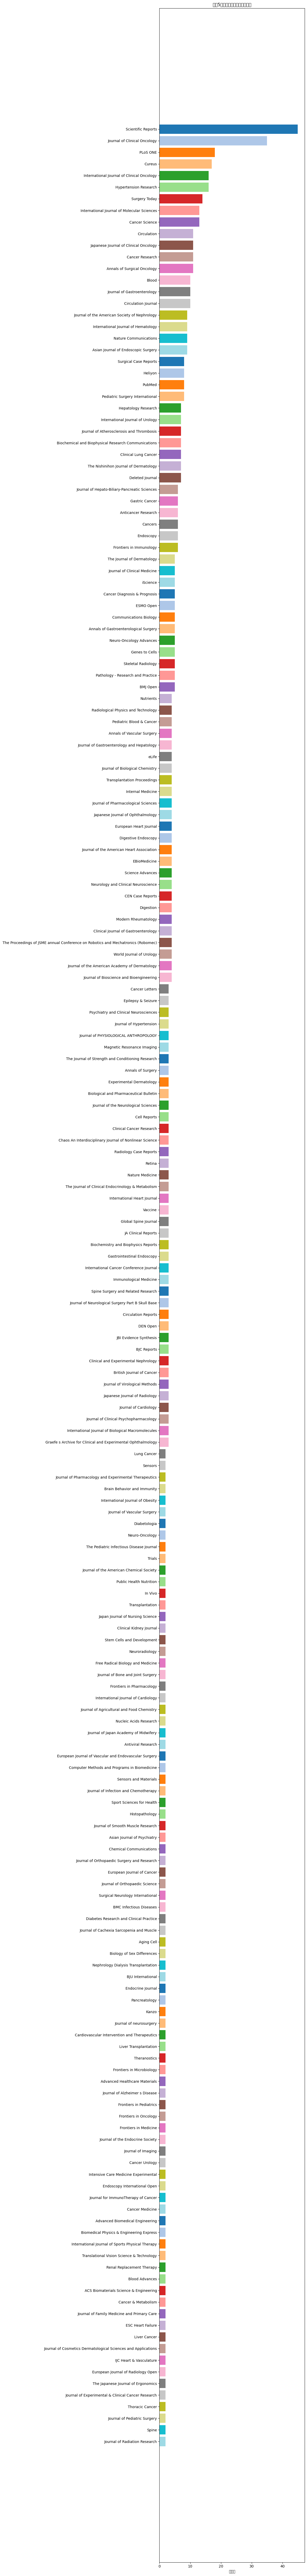

In [ ]:
import matplotlib.pyplot as plt

# ジャーナル名と出版数を抽出し、出版数で降順にソート
sorted_groups = sorted(work_groups, key=lambda x: x['count'], reverse=True)
labels = [group['key_display_name'] for group in sorted_groups]
counts = [group['count'] for group in sorted_groups]

# カラーマップを使って色を割り当て
cmap = plt.get_cmap("tab20")
colors = [cmap(i % 20) for i in range(len(labels))]

# グラフサイズを調整（ジャーナル数が多い場合）
plt.figure(figsize=(12, len(labels) * 0.5))

# 横棒グラフの描画
plt.barh(labels, counts, color=colors)
plt.xlabel("出版数")
plt.title("過去5年間のジャーナル別出版数")
plt.gca().invert_yaxis()  # 出版数が多いジャーナルを上に表示
plt.tight_layout()

# 保存
plt.savefig("journal_publications_bar_chart.png")
print("横棒グラフを 'journal_publications_bar_chart.png' に保存しました。")

---
Feel free to use the notebook and determine the percentage of Open Access works for your institution or tweak the filters to fit your analysis.  

Happy exploring! 😎